# installing packages

In [113]:
install.packages("RPostgres")
install.packages("DBI")
install.packages("ggplot2")


The downloaded binary packages are in
	/var/folders/3c/w369_d4j4zdfdgzx1wp7rn1w0000gn/T//RtmpqM2nfe/downloaded_packages

The downloaded binary packages are in
	/var/folders/3c/w369_d4j4zdfdgzx1wp7rn1w0000gn/T//RtmpqM2nfe/downloaded_packages

The downloaded binary packages are in
	/var/folders/3c/w369_d4j4zdfdgzx1wp7rn1w0000gn/T//RtmpqM2nfe/downloaded_packages


In [114]:
install.packages("GGally")


The downloaded binary packages are in
	/var/folders/3c/w369_d4j4zdfdgzx1wp7rn1w0000gn/T//RtmpqM2nfe/downloaded_packages


# importing the data

In [115]:
library(DBI)
library(RPostgres)

In [116]:
source("DB_connection.R")

In [117]:
# get cleaned asteroid data from postgres database

asteroid_data <- dbReadTable(con, "asteroid_info")

In [118]:
head(asteroid_data,10)

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,moid,class,n,per,ma,moid_bin,a_bin,e_bin,i_bin,h_bin
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,...,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,NA,2.792309,0.0747035,4.042140,1.95104,41.12190,2.583713,3.000904,4.666093,NA,...,NA,MBA,0.2112316,1704.290,27.143330,-1,6,2,1,6
2,NA,3.103365,0.1382649,9.809064,44.11452,53.44572,2.674278,3.532451,5.467106,30,...,1.704880,MBA,0.1802830,1996.860,229.123478,4,7,3,1,6
3,NA,3.112578,0.1229219,13.746126,78.84552,313.44325,2.729974,3.495182,5.491470,22,...,1.757750,MBA,0.1794831,2005.759,285.519692,4,7,3,2,6
4,NA,2.337617,0.1615937,3.715623,93.06944,11.88097,1.959873,2.715361,3.574112,2566,...,0.977085,MBA,0.2757682,1305.444,202.150980,2,5,4,1,7
5,NA,2.287730,0.1309658,7.102405,86.00376,225.28785,1.988115,2.587344,3.460312,3626,...,0.979899,MBA,0.2848374,1263.879,4.359645,2,5,3,1,6
6,NA,2.563276,0.3355581,12.021170,232.18565,138.12423,1.703148,3.423404,4.103943,NA,...,NA,MBA,0.2401657,1498.965,134.735370,-1,6,7,2,7
7,NA,2.422699,0.1588586,5.885917,97.96377,218.33688,2.037832,2.807566,3.771008,3460,...,1.026980,MBA,0.2613695,1377.361,274.483936,3,5,4,1,6
8,NA,2.560220,0.1749421,3.882600,335.13774,37.97169,2.112330,3.008110,4.096605,NA,...,NA,MBA,0.2405959,1496.285,150.115930,-1,6,4,1,6
9,NA,2.339203,0.1944429,4.944191,110.71620,242.56879,1.884362,2.794045,3.577752,2534,...,0.884112,MBA,0.2754876,1306.774,275.347510,2,5,4,1,7


In [119]:
str(asteroid_data)

'data.frame':	839714 obs. of  36 variables:
 $ name          : chr  NA NA NA NA ...
 $ a             : num  2.79 3.1 3.11 2.34 2.29 ...
 $ e             : num  0.0747 0.1383 0.1229 0.1616 0.131 ...
 $ i             : num  4.04 9.81 13.75 3.72 7.1 ...
 $ om            : num  1.95 44.11 78.85 93.07 86 ...
 $ w             : num  41.1 53.4 313.4 11.9 225.3 ...
 $ q             : num  2.58 2.67 2.73 1.96 1.99 ...
 $ ad            : num  3 3.53 3.5 2.72 2.59 ...
 $ per_y         : num  4.67 5.47 5.49 3.57 3.46 ...
 $ data_arc      : int  NA 30 22 2566 3626 NA 3460 NA 2534 8863 ...
 $ condition_code: int  0 6 7 2 3 2 1 2 4 0 ...
 $ n_obs_used    : int  42 9 12 31 20 23 62 61 14 54 ...
 $ h             : num  17.4 16.9 16.8 18.4 17.6 ...
 $ neo           : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ pha           : logi  NA FALSE FALSE FALSE FALSE NA ...
 $ diameter      : num  NA NA NA NA NA NA NA NA NA NA ...
 $ extent        : chr  NA NA NA NA ...
 $ albedo        : num  NA NA NA NA N

In [120]:
summary(asteroid_data)

     name                 a                    e                 i            
 Length:839714      Min.   :-104279.22   Min.   :0.00000   Min.   :  0.00755  
 Class :character   1st Qu.:      2.39   1st Qu.:0.09145   1st Qu.:  4.06908  
 Mode  :character   Median :      2.64   Median :0.14365   Median :  7.25710  
                    Mean   :      2.76   Mean   :0.15564   Mean   :  8.94983  
                    3rd Qu.:      3.00   3rd Qu.:0.19940   3rd Qu.: 12.25565  
                    Max.   :   3043.15   Max.   :1.20113   Max.   :175.18873  
                    NA's   :2                                                 
       om                 w                  q                  ad          
 Min.   :  0.0004   Min.   :  0.0017   Min.   : 0.07051   Min.   :   0.774  
 1st Qu.: 80.2114   1st Qu.: 91.0416   1st Qu.: 1.97194   1st Qu.:   2.775  
 Median :160.2949   Median :181.6695   Median : 2.22551   Median :   3.038  
 Mean   :168.4995   Mean   :181.0758   Mean   : 2.40473   Me

In [121]:
colnames(asteroid_data)  

[1] "name"           "a"              "e"              "i"             
 [5] "om"             "w"              "q"              "ad"            
 [9] "per_y"          "data_arc"       "condition_code" "n_obs_used"    
[13] "h"              "neo"            "pha"            "diameter"      
[17] "extent"         "albedo"         "rot_per"        "gm"            
[21] "bv"             "ub"             "ir"             "spec_b"        
[25] "spec_t"         "g"              "moid"           "class"         
[29] "n"              "per"            "ma"             "moid_bin"      
[33] "a_bin"          "e_bin"          "i_bin"          "h_bin"

In [122]:
dim(asteroid_data)

[1] 839714     36

# implementing bayes classifier for NEO (near earth object)

In [123]:
# Set seed for reproducibility
set.seed(123)

# Split the data
train_index <- sample(1:nrow(asteroid_data), 0.8 * nrow(asteroid_data))
asteroid_train <- asteroid_data[train_index, ]
asteroid_test <- asteroid_data[-train_index, ]


In [124]:
  # Function to calculate conditional probabilities for a given feature and class
  cond_prob <- function(feature, value, class_label, target_var) {
    class_data <- asteroid_train[asteroid_train$neo == class_label & !is.na(asteroid_train$neo), ]

    # Count occurrences of the feature value in the class data
    count_value <- sum(class_data[[feature]] == value, na.rm = TRUE)
    
    # Calculate probability with Laplace smoothing
    prob <- (count_value + 1) / (nrow(class_data) + length(unique(asteroid_train[[feature]])))
    return(prob)
  }

In [125]:
# Function to train the Naive Bayes classifier and make predictions
naive_bayes_predict <- function(train_data, new_instance) {
  
  # Calculate prior probabilities for the target (NEO)
  prior_neo_1 <- sum(train_data$neo == TRUE, na.rm = TRUE) / nrow(train_data)
  prior_neo_0 <- sum(train_data$neo == FALSE, na.rm = TRUE) / nrow(train_data)
  
  # Calculate posterior probability for NEO = 1
  posterior_neo1 <- prior_neo_1 *
                    cond_prob("moid_bin", new_instance$moid_bin, 1) *
                    cond_prob("a_bin", new_instance$a_bin, 1) *
                    cond_prob("e_bin", new_instance$e_bin, 1) *
                    cond_prob("i_bin", new_instance$i_bin, 1) *
                    cond_prob("h_bin", new_instance$h_bin, 1)
  
  # Calculate posterior probability for NEO = 0
  posterior_neo0 <- prior_neo_0 *
                    cond_prob("moid_bin", new_instance$moid_bin, 0) *
                    cond_prob("a_bin", new_instance$a_bin, 0) *
                    cond_prob("e_bin", new_instance$e_bin, 0) *
                    cond_prob("i_bin", new_instance$i_bin, 0) *
                    cond_prob("h_bin", new_instance$h_bin, 0)
  
  # Prediction based on the highest posterior probability
  predicted_class <- ifelse(posterior_neo1 > posterior_neo0, 1, 0)
  return(predicted_class)
}

# Example usage with a new instance
# new_instance should be a list with the binned values
new_instance <- list(moid_bin = "1", a_bin = "1", e_bin = "1", i_bin = "1", h_bin = "1")

# Predict NEO for the new instance
predicted_class <- naive_bayes_predict(train_data = asteroid_train, new_instance = new_instance)
print(paste("Predicted NEO class:", predicted_class))


[1] "Predicted NEO class: 1"


In [108]:
# Convert factor or character columns to numeric
asteroid_test$moid_bin <- as.numeric(as.character(asteroid_test$moid_bin))
asteroid_test$a_bin <- as.numeric(as.character(asteroid_test$a_bin))
asteroid_test$e_bin <- as.numeric(as.character(asteroid_test$e_bin))
asteroid_test$i_bin <- as.numeric(as.character(asteroid_test$i_bin))
asteroid_test$h_bin <- as.numeric(as.character(asteroid_test$h_bin))

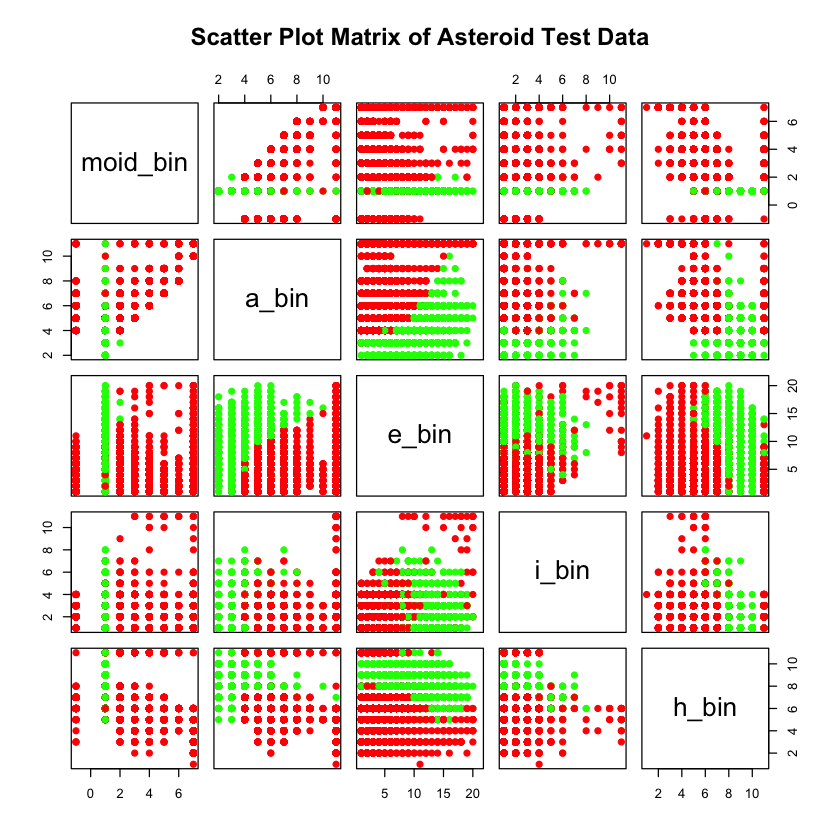

In [112]:
# Create a scatter plot matrix
par(bg = "white")
pairs(asteroid_test[, c("moid_bin", "a_bin", "e_bin", "i_bin", "h_bin")], 
      col = ifelse(asteroid_test$neo == 1, "green", "red"), 
      pch = 19, 
      main = "Scatter Plot Matrix of Asteroid Test Data")


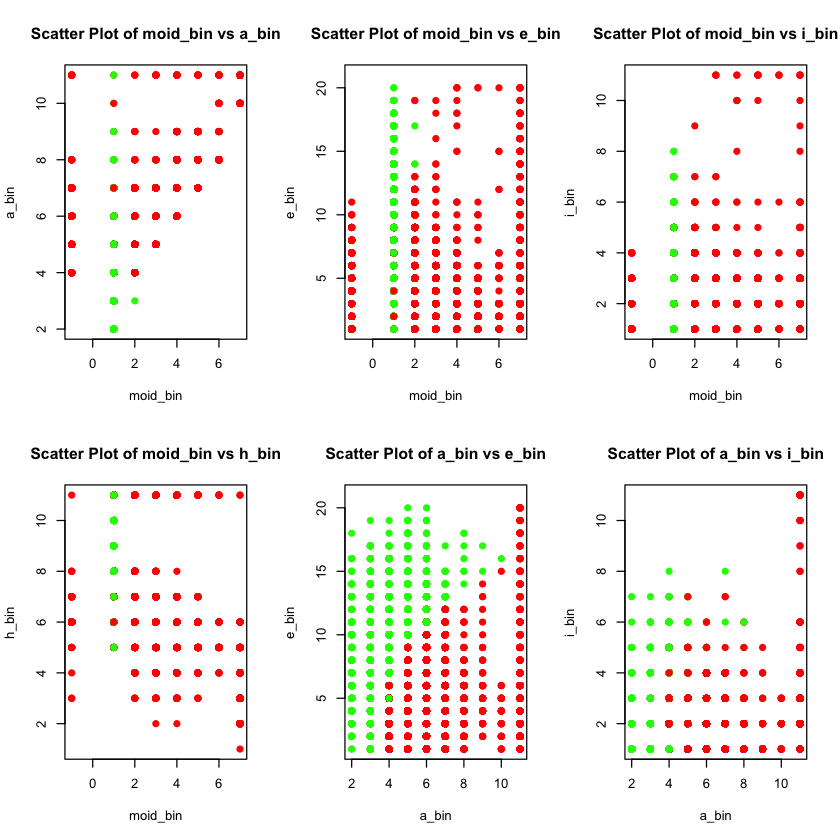

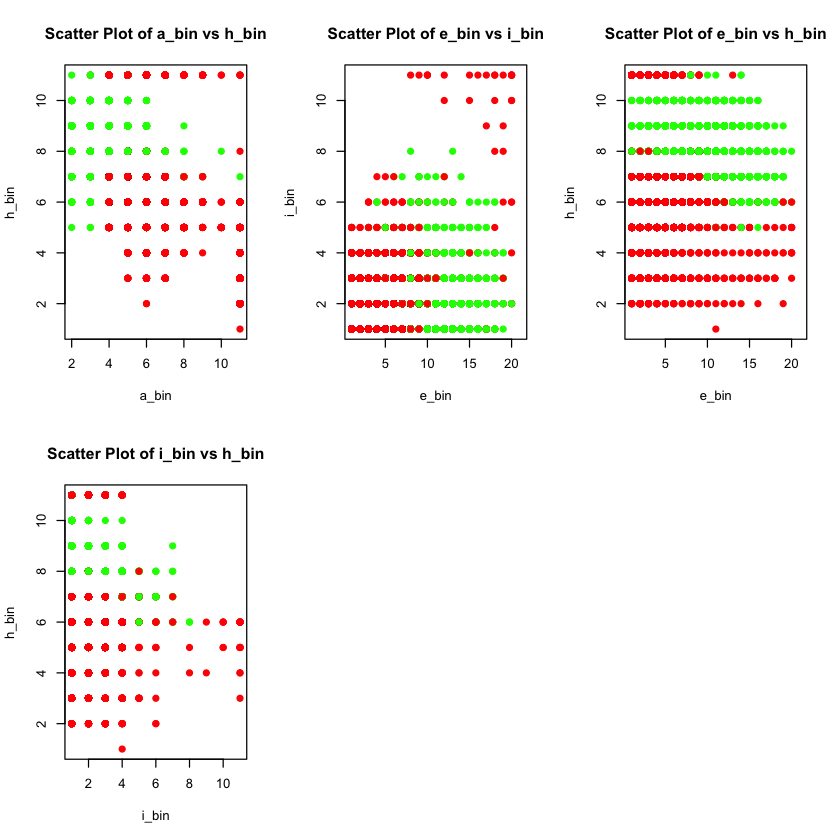

In [127]:
par(mfrow = c(2, 3), bg = "white")  # Adjust according to the number of plots

# List of features to plot against each other
features <- c("moid_bin", "a_bin", "e_bin", "i_bin", "h_bin")

# Create scatter plots for each pair of features
for (i in 1:(length(features) - 1)) {
  for (j in (i + 1):length(features)) {
    plot(asteroid_test[[features[i]]], 
         asteroid_test[[features[j]]], 
         col = ifelse(asteroid_test$neo == 1, "green", "red"), 
         pch = 19, 
         main = paste("Scatter Plot of", features[i], "vs", features[j]), 
         xlab = features[i], 
         ylab = features[j], 
         bg = "white")
  }
}


# implementing bayes classifier for PHA (Physically Hazardous Asteroid)

In [144]:
test <- function(target){
  return(sum(asteroid_data$target== TRUE, na.rm = TRUE))
}

print(test("neo"))
sum(asteroid_data$neo == TRUE, na.rm = TRUE)

[1] 0


[1] 21400